In [2]:
import os
from document import Document
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np

Loaded 6978 ieee taxonomy keywords


In [3]:
def load_data(path='data/train/', data_type='train'):
    """
    由于任务更换为给出关键词后预测关系，所以不管是train还是test都加载.ann文件
    """
    
    assert (data_type in ['train', 'dev', 'test'])
    corpus = []
    
    # path can be multiple values separated by comma
    for p in path.split(','):
        for f in os.listdir(p): 
            if f.endswith('.txt'):
                corpus.append(Document(os.path.join(p, f), data_type))
    for doc in corpus:
        doc.load_ann_files()
    return corpus

In [4]:
corpus = load_data()

all_sentences = [] # 一维数组，包含所有句子
all_keywords = [] # 一维数组，包含所有关键短语
kw_tokenized = [] # 二维数组，包含tokenize后的关键短语
st_tokenized = [] # 二维数组，包含tokenize后的所有句子（word2vec参数）
all_kw = [] # 一维数组，包含关键短语中的所有词

cnt = 0
for document in corpus:
    all_keywords += document.keyphrases
    for words in document.keyphrases:
        tmp_word = words.split()
        kw_tokenized.append(tmp_word)
        if document.kp_cnt[words] < 5 and len(tmp_word)==1:
            print(cnt, words, document.kp_cnt[words])
            cnt += 1
    for sentence in document.sentences:
        all_sentences.append(sentence.sent)
    for sentence in document.all_text:
        s = sentence.replace("\xa0", " ")
        all_sentences.append(sentence)
        
st_tokenized = [s.split() for s in all_sentences]

Found more than 3 field in data/train/S0021999114008523.ann line: *	Synonym-of T11 T12 T10
Found more than 3 field in data/train/S0021999115003459.ann line: *	Synonym-of T3 T1 T4 T7 T18
Found more than 3 field in data/train/S0022311514008691.ann line: *	Synonym-of T2 T3 T4
Found more than 3 field in data/train/S0022311515002391.ann line: *	Synonym-of T2 T3 T5
Found more than 3 field in data/train/S0098300413002720.ann line: *	Synonym-of T12 T11 T16
Found more than 3 field in data/train/S0370269304007129.ann line: *	Synonym-of T2 T3 T14
Found more than 3 field in data/train/S0370269304009268.ann line: *	Synonym-of T14 T24 T12
Found more than 3 field in data/train/S0895611116300684.ann line: *	Synonym-of T3 T4 T12
[439, 455] vs [374, 454] AAMM (no adapt.) The estimation errors for AAMM and its non-adaptive counterpart, AAMM (no adapt.
Found more than 3 field in data/train/S2212671612002181.ann line: *	Synonym-of T7 T10 T16
Found more than 3 field in data/train/S2212671612002302.ann line:

817 visualized 1
818 SL[DXR] 1
819 stimulation 1
820 nanoparticles 2
821 cyanocobalamin 2
822 centrifugation 1
823 decanting 1
824 supernatant 1
825 residue 1
826 acetone 2
827 precipitate 1
828 solid 2
829 acetone 2
830 propanol 1
831 butanol 1
832 ammonia 1
833 water 1
834 lyophilisation 1
835 Immunopotentiators 0
836 PRRs 2
837 TLRs 1
838 PRRs 2
839 TLR9 1
840 stimulated 1
841 CpG 4
842 adjuvant 2
843 CpG 4
844 liposomes 1
845 nanocomplexes 3
846 prepared 3
847 added 2
848 incubated 2
849 added 2
850 incubated 2
851 DNA 2
852 peptide 3
853 added 2
854 incubated 2
855 added 2
856 liposome 3
857 incubated 2
858 LPD 2
859 LCPRGPD 2
860 added 2
861 DOTMA 2
862 DOPE 2
863 LCPRG 2
864 DNA 2
865 LPD 2
866 LADP 1
867 PDLA 1
868 PDLAP1 1
869 PDLAP2 1
870 PDLAPRG 1
871 LCPRGPD 2
872 (13)σ=ftexp(−ϵinhwft)if(ϵin>0) 1
873 ylides 3
874 1,3-DC 2
875 HOMOylide–pyrene–LUMOylide 1
876 HOMOylide–LUMOylide–pyrene 2
877 ylidepyrene 3
878 ylideC2/C6–ylidepyrene-C3 1
879 ylideC7–ylidepyrene/C2 1
880 SWNTs

1483 algorithms 2
1484 queries 1
1485 algorithms 2
1486 extension 1
1487 disambiguation 1
1488 KM 3
1489 KMS 2
1490 extended 2
1491 RBAC 1
1492 KMS 2
1493 ETD 2
1494 quality 4
1495 objectives 1
1496 (time 1
1497 cost 3
1498 quality 4
1499 patient 2
1500 microphone 1
1501 speaker 1
1502 monitor 2
1503 communicate 1
1504 simulation 1
1505 data 2
1506 CIRC 1
1507 Multi-Clouds 1
1508 Interclouds 1
1509 DepSky 1
1510 comparisons 1
1511 LMS 1
1512 SMI 1
1513 RLS 1
1514 CGM 1
1515 algorithm 2
1516 algorithms 1
1517 beamforming 3
1518 beamwidth 1
1519 feasibilities 1
1520 Video-oculography 0
1521 VOG 3
1522 VOG 3
1523 morphology 1
1524 stimulation 1
1525 VOG 3
1526 elements 1
1527 obstacle 2
1528 scene 1
1529 detected 1
1530 images 1
1531 classification 2
1532 classification 2
1533 computation 1
1534 algorithms 1
1535 computation 2
1536 retrieve 2
1537 database 3
1538 heterogeneity 1
1539 alloys 2
1540 foundry 1
1541 spectrophotometer 1
1542 PMS 1
1543 galloping 4
1544 galloping 4
1545 gallopi

In [5]:
for words in kw_tokenized:
    all_kw += words
print(all_kw)

['nuclear', 'theory', 'thermalization', 'thermalization', 'semi-classical', 'methods', 'nuclear', 'reactions', 'quantum', 'liquids', 'improved', 'molecular', 'dynamics', 'methods', 'combining', 'quantum', 'features', 'field', 'of', 'clusters', 'and', 'nano', 'structures', 'lasers', 'imaging', 'techniques', 'qualitatively', 'describe', 'dynamical', 'processes.', 'simple', 'metals', 'simple', 'metals', 'with', 'sufficiently', 'delocalized', 'wave', 'functions', 'organic', 'systems', 'C60', 'very', 'intense', 'laser', 'pulses', 'quantum', 'mechanical', 'features', 'quantum', 'shell', 'effects', 'semi', 'classical', 'treatment', 'of', 'dynamical', 'correlations', 'quantum', 'approach', 'Dirac', 'equation', 'Pauli', 'equation', 'continuum', 'space-time', 'massless', 'spin-1/2', 'particles', 'objects', 'hopping', 'on', 'a', 'lattice', 'instead', 'of', 'particles', 'The', 'Creutz', 'model', 'measurement', 'scenario', 'motion', 'of', 'the', 'particle', 'future', 'research', 'particles', 'movin

In [6]:
model = Word2Vec(st_tokenized, sg=1, size=10, window=5, min_count=1, workers=1)

In [7]:
cnt = 0
for word, vocab_obj in model.wv.vocab.items():
    if vocab_obj.count < 5 and (word in all_kw): # Print keywords that show up less that 5 times
        print(cnt, word, vocab_obj.count)
        cnt += 1
#vocab_obj = model.wv.vocab["Monte"]
#vocab_obj.count

0 (HF 3
1 pentagons 4
2 pedagogical 2
3 electromagnetism 3
4 clarified 3
5 three-pulse 4
6 Time-integrated 2
7 Effect 2
8 Zn(II)–OEP 2
9 inner-shell 2
10 K-edge 4
11 Matlab® 2
12 Levenberg–Marquardt 2
13 biexponential 2
14 τ1=35fs 2
15 τ1=36fs 2
16 norbornadiene 2
17 neutrals 2
18 CPD 3
19 aberration-corrected 3
20 sub-Ångstrom 2
21 Stone–Wales 3
22 protrusion 3
23 hydrogenated 2
24 SA, 4
25 hoping 2
26 (TSH) 2
27 quartet 2
28 quasiclassical 3
29 optoelectronic 3
30 LEDs 4
31 biosensing 3
32 chemosensing 2
33 excitons 3
34 dipole–dipole 2
35 unipolar 3
36 field-dependent 3
37 capacitance–voltage 4
38 spectrophotometer 4
39 cross-overs 2
40 Metropolis 4
41 Empyrean 3
42 SPM 1
43 radiation-induced 3
44 photo-radiation 2
45 DBS 2
46 shockwave 2
47 cavitations 2
48 TV 2
49 XL-30 2
50 FEG 3
51 ESEM 3
52 LEO 3
53 1530VP 3
54 FEGSEM 2
55 Focused 2
56 Jeol 2
57 2000FX 2
58 W-filament 2
59 EDAX 4
60 Genesis 2
61 Emission 3
62 motorway 2
63 Impressed 2
64 Cathodic 3
65 Protection 2
66 histogram.

530 Polydimethylsiloxane 1
531 throttle 3
532 ultra-nanocrystalline 2
533 UNCD 4
534 RCA 2
535 Nanofeature 2
536 (ECD) 2
537 (TSV) 2
538 suppressor. 4
539 diffusion–adsorption 1
540 LSM 2
541 poly-dimethylsiloxane 2
542 film-substrate 3
543 uni-axial 2
544 Brittle 2
545 Fragmentation 3
546 delaminate 2
547 SEMs 1
548 molds 4
549 “soft-lithography” 2
550 soft-lithography 2
551 SoftLithoBox® 2
552 laminated 2
553 cutter 3
554 gluing 4
555 collagen-mimetic 2
556 fiber-like 2
557 self-assemled 2
558 Mice 3
559 pseudo-metastatic 4
560 Scrambled 2
561 peptide-functionalized 2
562 HEPES-buffered 2
563 Survival 2
564 infected 3
565 retrovirally-transduced 2
566 d-luciferin 3
567 saline 4
568 Java 2
569 pharmacyte 2
570 cell-bound 2
571 “re-arming” 2
572 adoptively-transferred 3
573 internalizing 2
574 peptide-MHC 2
575 peptide-MHC-functionalized 2
576 patient's 2
577 immunotherapy 3
578 cures 4
579 cytokines 4
580 clone 1
581 α-ω-aminohexylcarbamate 3
582 CDI 2
583 1,6-hexanediamine 2
584 deca

1153 beamforming 3
1154 Inversion 1
1155 Recursive 1
1156 Conjugate 1
1157 feasibilities 1
1158 Video-oculography 1
1159 VOG 2
1160 pupil 3
1161 Canny 1
1162 WIFI-based 1
1163 amplitude-frequency 2
1164 correlative 1
1165 early-warning 1
1166 Obstacle 2
1167 homography 1
1168 attribution 1
1169 auto-adapted 1
1170 thyristor 1
1171 object-orientation-based 2
1172 reliability-centered 1
1173 retrieving 1
1174 Al-Si 1
1175 die-casting 1
1176 foundry 1
1177 CLH 1
1178 SPECTROLAB 1
1179 JR.CCD 1
1180 non-fragile 3
1181 LMI 1
1182 fuzzy-Hammerstein 1
1183 stirred-tank 1
1184 T-S 2
1185 Hammerstein 2
1186 recongnization 1
1187 CSTR 1
1188 PID 1
1189 Screws 1
1190 screws 2
1191 multi-axis 1
1192 tool-path 1
1193 scallop 1
1194 computationally-expensive 1
1195 conquer 1
1196 Ti-Al 1
1197 defense 1
1198 Visio 1
1199 parsing 1
1200 Enumeration 1
1201 PSO 1
1202 FDI 2
1203 ARIMA- 1
1204 GARCH-M 1
1205 Monitoring 1
1206 tramway 1
1207 rail 1
1208 non-conventionalprocedure 1
1209 rails 2
1210 image-

In [7]:
X = list(word_vector.values())
y = list(word_vector.keys())
#X = np.array(word_vector.values())
#y = word_vector.keys()
X_embedded = TSNE(n_components=2).fit_transform(X, y)

In [15]:
np.array(X_embedded)
print(X_embedded.shape[0])
print(len(y))

18731
18731


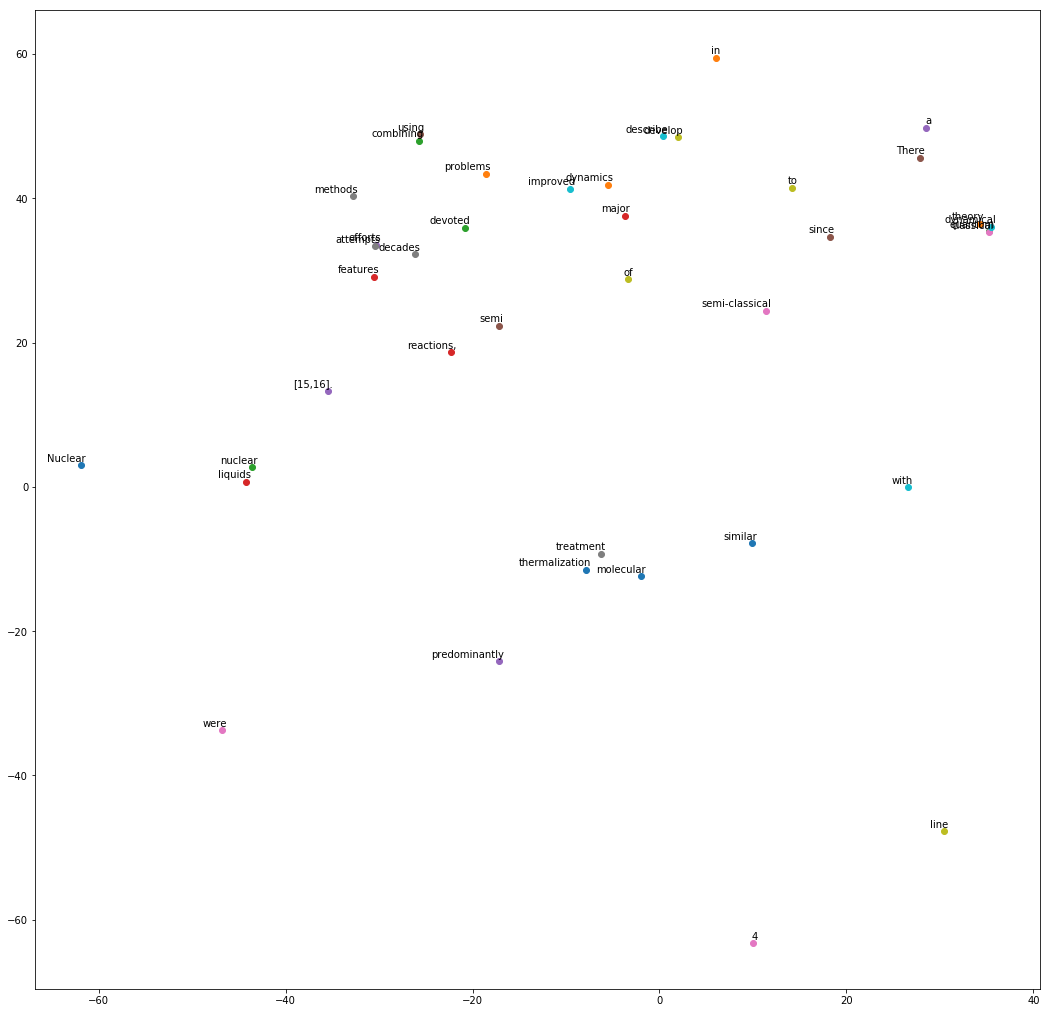

In [20]:
import matplotlib.pyplot as plt
"""
Visualizing embedded keyword vectors by T-SNE and matplotlib
"""

plot_only = 40
labels = [y[i] for i in range(plot_only)]
plt.figure(figsize=(18, 18))  #in inches
for i, label in enumerate(labels):
    x1, x2 = X_embedded[i,:]
    plt.scatter(x1, x2)
    plt.annotate(label,
        xy=(x1, x2),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')